# UAT (Universal Approximation Theorem)
- 유한한 수의 뉴런을 포함하는 단일 hidden layer 로 구성된 신경망은 hidden layer 의 활성화 함수가 비선형 연속 함수일 경우 임의의 정확도로 모든 연속함수를 근사할 수 있다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# 예시 1 -> sin 함수

In [2]:
# sin 함수에서 학습 데이터 생성
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_train = np.sin(x_train)

In [3]:
x_train[:10], y_train[:10]

(array([-6.28318531, -6.27060636, -6.25802741, -6.24544846, -6.23286951,
        -6.22029056, -6.20771161, -6.19513266, -6.18255371, -6.16997476]),
 array([2.44929360e-16, 1.25786178e-02, 2.51552454e-02, 3.77278927e-02,
        5.02945704e-02, 6.28532900e-02, 7.54020646e-02, 8.79389084e-02,
        1.00461838e-01, 1.12968871e-01]))

In [4]:
# 데이터 전처리 (reshape)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [5]:
x_train[:10], y_train[:10]

(array([[-6.28318531],
        [-6.27060636],
        [-6.25802741],
        [-6.24544846],
        [-6.23286951],
        [-6.22029056],
        [-6.20771161],
        [-6.19513266],
        [-6.18255371],
        [-6.16997476]]),
 array([[2.44929360e-16],
        [1.25786178e-02],
        [2.51552454e-02],
        [3.77278927e-02],
        [5.02945704e-02],
        [6.28532900e-02],
        [7.54020646e-02],
        [8.79389084e-02],
        [1.00461838e-01],
        [1.12968871e-01]]))

In [6]:
# 테스트용 데이터 -> 원 함수를 잘 복원해 내는가?
x_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.sin(x_test)

# 데이터 전처리 (reshape)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [7]:

x_test[:10], y_test[:10]

(array([[-6.28318531],
        [-6.15625227],
        [-6.02931923],
        [-5.9023862 ],
        [-5.77545316],
        [-5.64852012],
        [-5.52158709],
        [-5.39465405],
        [-5.26772102],
        [-5.14078798]]),
 array([[2.44929360e-16],
        [1.26592454e-01],
        [2.51147987e-01],
        [3.71662456e-01],
        [4.86196736e-01],
        [5.92907929e-01],
        [6.90079011e-01],
        [7.76146464e-01],
        [8.49725430e-01],
        [9.09631995e-01]]))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2025-03-27 15:48:39.661948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-27 15:48:39.662191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-03-27 15:48:39.908725: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-03-27 15:48:40.070526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/4 [======>.......................] - ETA: 0s

2025-03-27 15:48:42.183748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 123ms/step


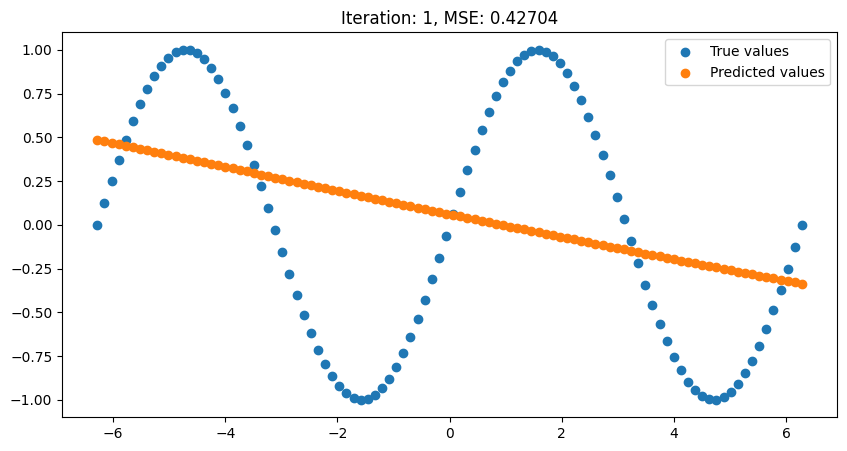

4/4 [==============================] - 0s 2ms/step


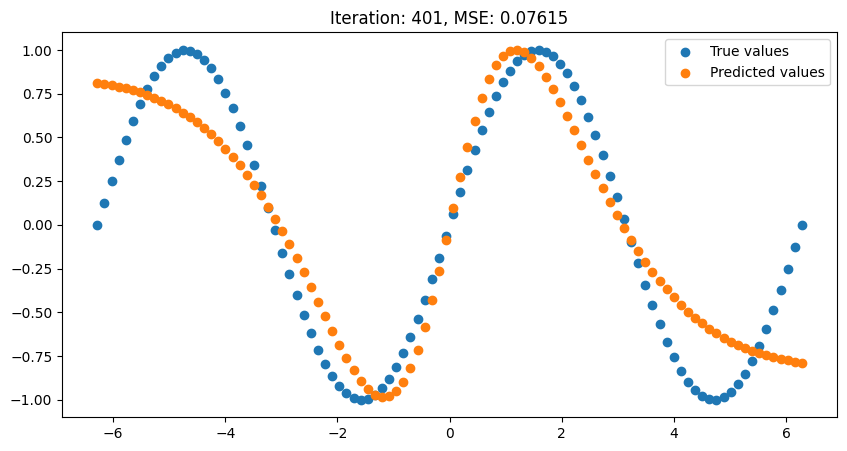

4/4 [==============================] - 0s 2ms/step


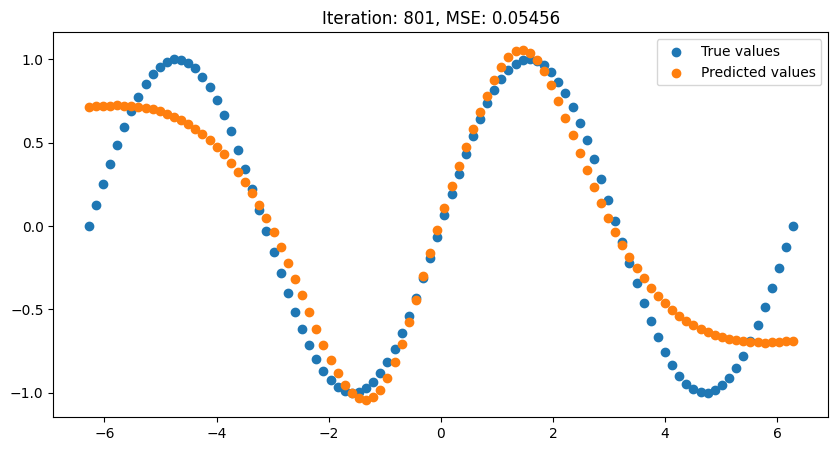

4/4 [==============================] - 0s 2ms/step


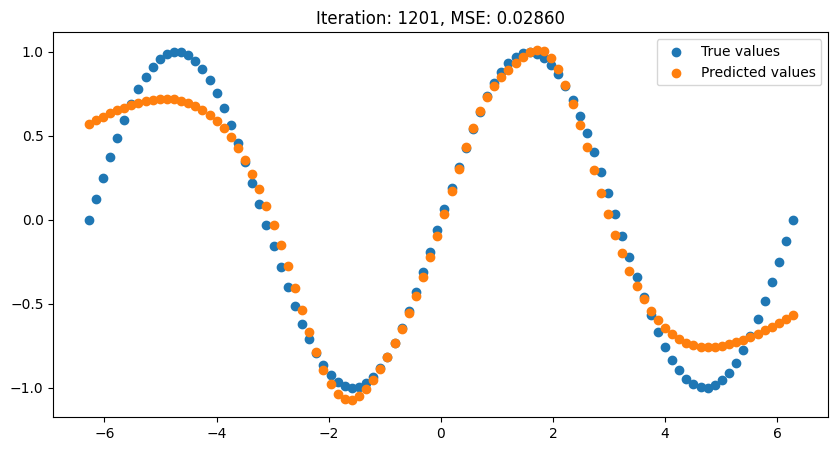

4/4 [==============================] - 0s 2ms/step


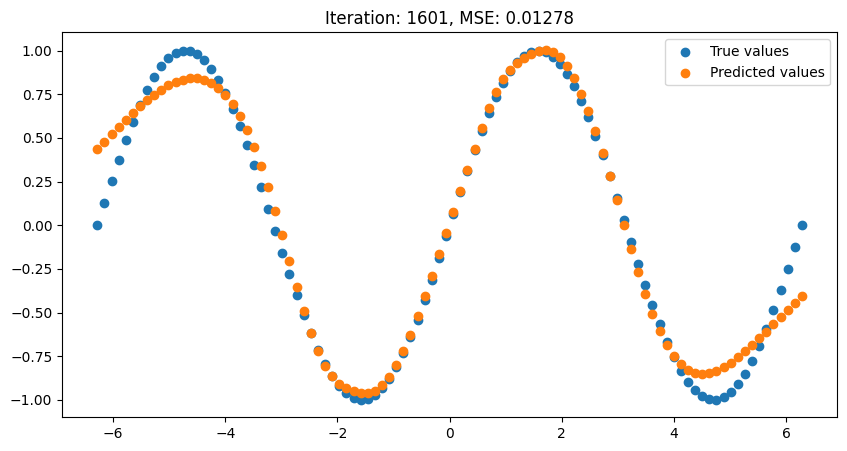

In [8]:
# 모델 초기화 -> 1개의 hidden layer
model = Sequential()
model.add(Dense(50, input_dim=1, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습 및 예측 결과 시각화 -> 적절한 수의 epoch마다 결과물 표시
for i in range(2000):
    model.fit(x_train, y_train, epochs=1, verbose=0)
    if i % 400 == 0:
        y_pred = model.predict(x_test)
        plt.figure(figsize=(10, 5))
        plt.scatter(x_test, y_test, label='True values')
        plt.scatter(x_test, y_pred, label='Predicted values')
        mse = mean_squared_error(y_test, y_pred)
        plt.title(f'Iteration: {i+1}, MSE: {mse:.5f}')
        plt.legend()
        plt.show()

In [9]:
trainable_parameters = model.trainable_variables

# 파라미터 출력
for parameter in trainable_parameters:
    print(parameter.value())
    print(parameter.name, parameter.shape)

tf.Tensor(
[[ 1.3728858   2.353066   -1.2058691  -0.2514502  -1.2088765  -3.8352613
   1.3905387  -1.1802697   2.3396504  -1.4162165   1.3674809   1.3475945
   1.3310373   2.1035273   2.184963    1.8151852   1.551706    1.372625
   1.4329488   1.5494137  -0.26367554  1.3104721   1.3459073  -1.181075
  -0.2533727  -0.2518515  -1.1838808  -1.2040339   1.4407262  -1.1870842
   0.2522126  -1.310635   -1.5280366   1.311992    3.1917396   2.2592053
  -1.1810985  -1.3440474  -1.180173    1.3330989  -1.1817659  -1.2395903
  -0.2517453  -2.8021653  -1.201388   -3.564499   -1.20006     2.1346507
  -1.4095694  -1.1872847 ]], shape=(1, 50), dtype=float32)
dense/kernel:0 (1, 50)
tf.Tensor(
[-0.6547599   0.90111226 -2.0800002  -0.11217342 -2.1263704   2.128056
 -0.7944312  -1.3350525   3.0906892  -4.01682    -0.5973862  -0.44578093
 -0.32732928 -6.998672   -7.647442   -3.9426668  -2.1946435  -0.63721657
 -1.1745566  -2.1787007  -0.52560836 -0.191085   -0.43663147 -1.1687126
 -0.26068404 -0.16870622 

# 예시 2 -> 이상한 함수

In [10]:
# 이상한 함수 정의
def strange_function(x):
    return np.abs(x) * np.sin(x)

# Generate training data
x_train = np.linspace(-10, 10, 1000)
y_train = strange_function(x_train)

# Generate test data
x_test = np.linspace(-10, 10, 100)
y_test = strange_function(x_test)

2025-03-27 15:53:03.485469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 6ms/step


2025-03-27 15:53:03.808418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


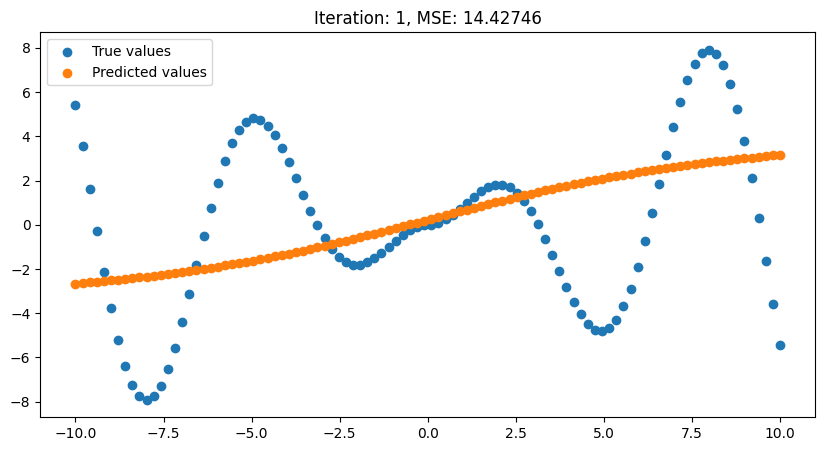

4/4 [==============================] - 0s 2ms/step


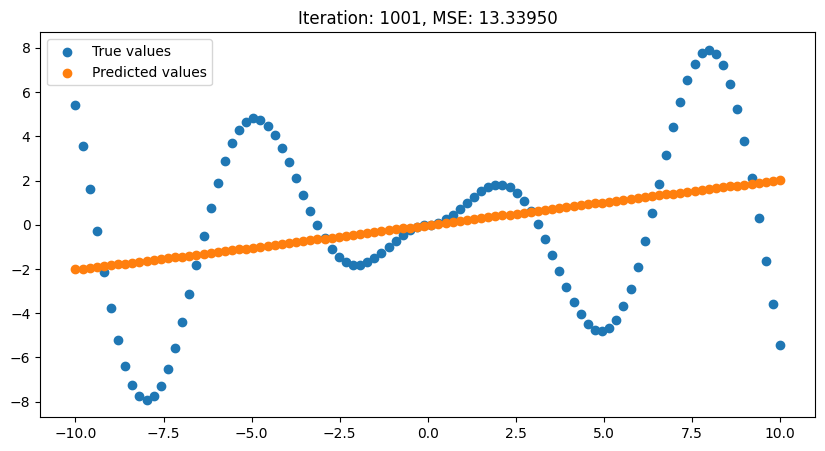

4/4 [==============================] - 0s 2ms/step


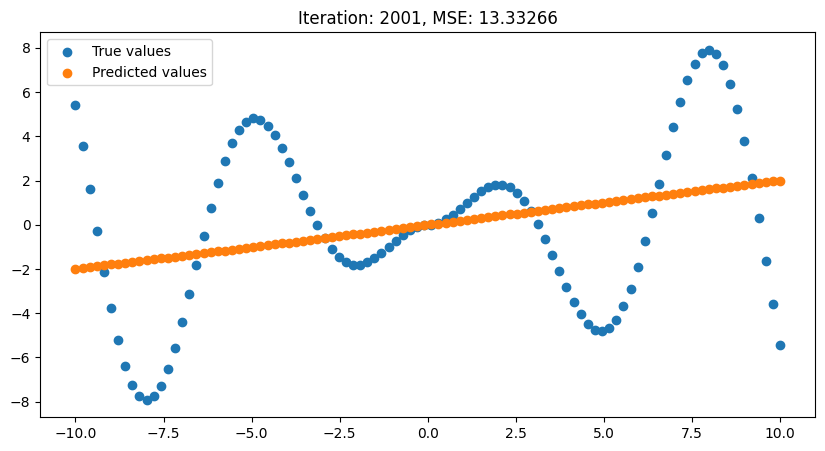

4/4 [==============================] - 0s 2ms/step


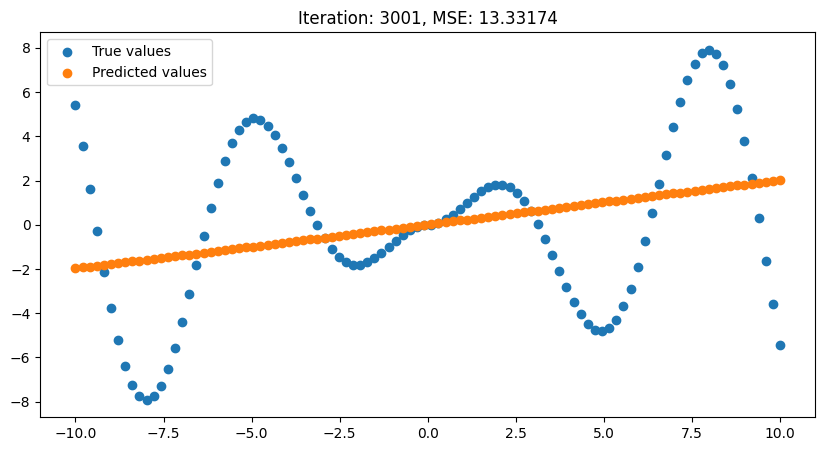

4/4 [==============================] - 0s 2ms/step


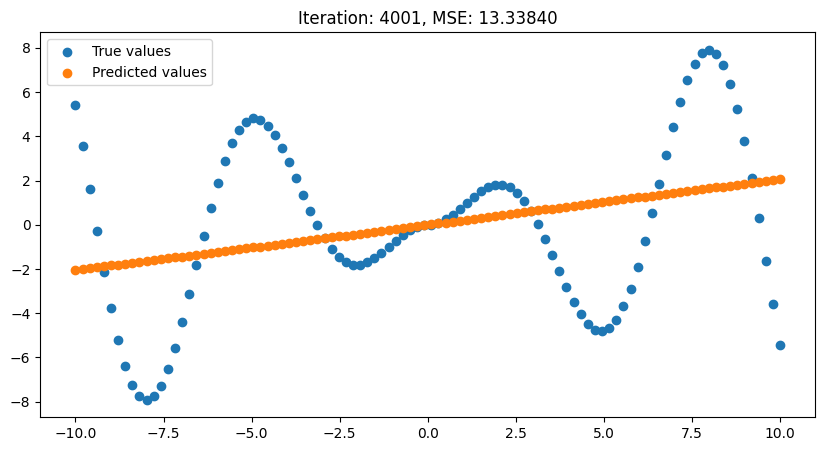

4/4 [==============================] - 0s 2ms/step


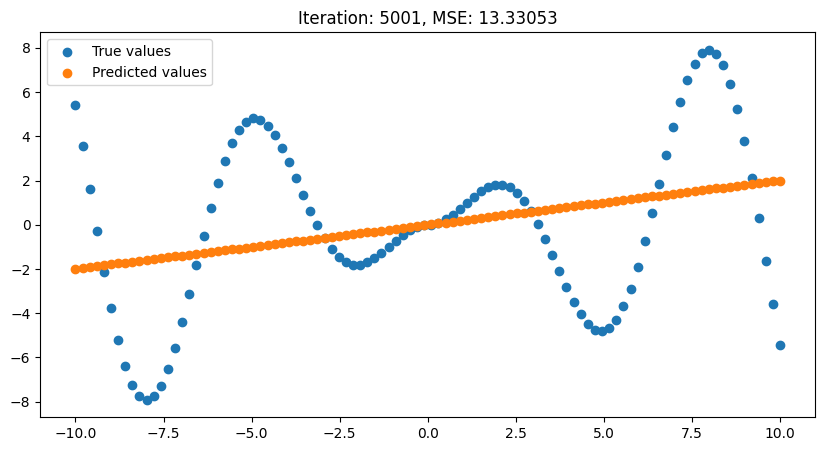

4/4 [==============================] - 0s 2ms/step


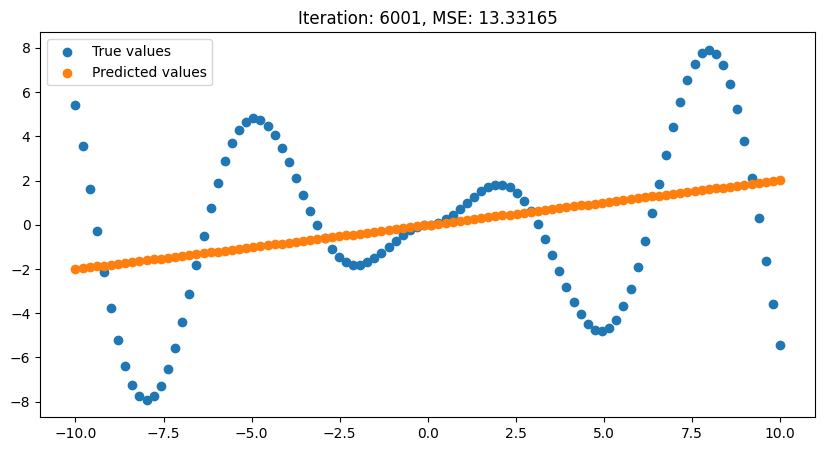

4/4 [==============================] - 0s 2ms/step


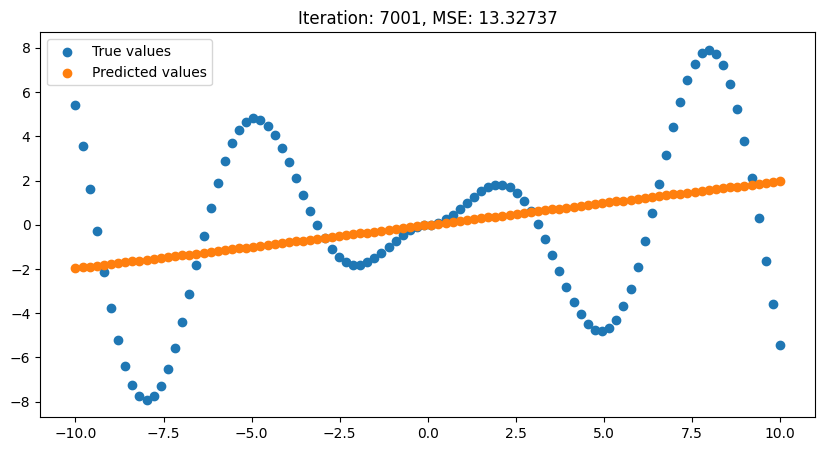

4/4 [==============================] - 0s 2ms/step


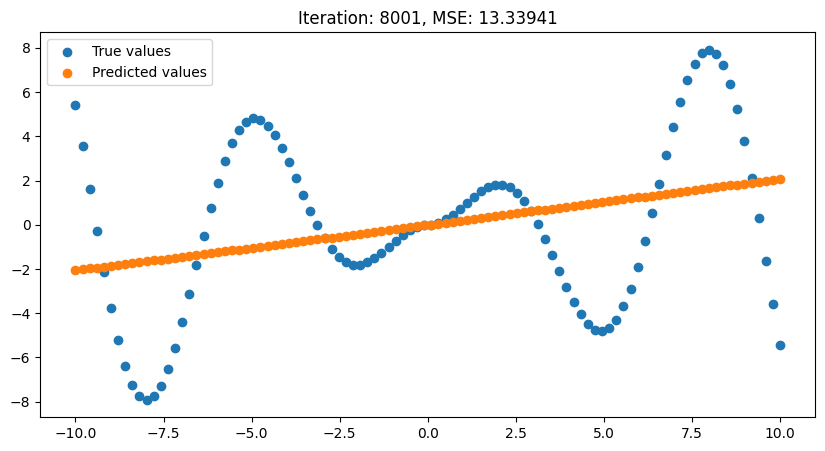

4/4 [==============================] - 0s 2ms/step


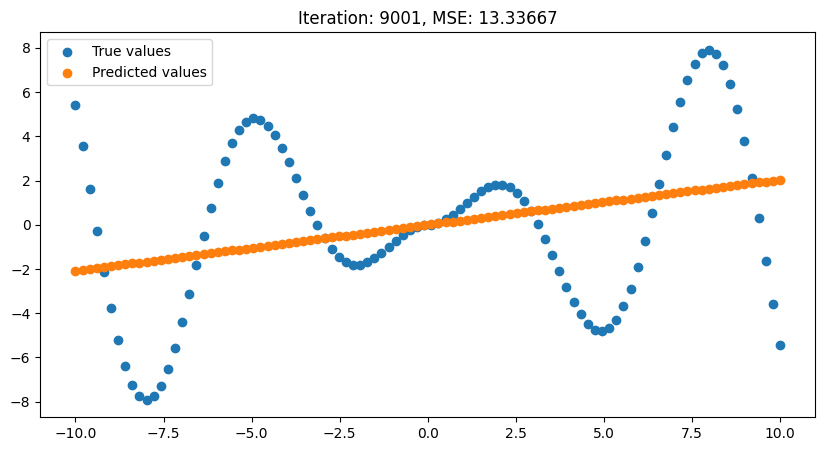

In [11]:
# Model initialization
model = Sequential()
model.add(Dense(50, input_dim=1, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model and plot prediction after every 100 epochs
for i in range(10000):
    model.fit(x_train, y_train, epochs=1, verbose=0)
    if i % 1000 == 0:
        y_pred = model.predict(x_test)
        plt.figure(figsize=(10, 5))
        plt.scatter(x_test, y_test, label='True values')
        plt.scatter(x_test, y_pred, label='Predicted values')
        mse = mean_squared_error(y_test, y_pred)
        plt.title(f'Iteration: {i+1}, MSE: {mse:.5f}')
        plt.legend()
        plt.show()

In [12]:
trainable_parameters = model.trainable_variables

# 파라미터 출력
for parameter in trainable_parameters:
    print(parameter.value())
    print(parameter.name, parameter.shape)

tf.Tensor(
[[ 0.13116716 -0.1204382  -0.12611039  0.14366329 -0.121312    0.13634782
   0.13036448 -0.11827228 -0.11863427  1.1492422   0.12726016  0.12710817
   0.12711293  0.22075176  0.47836754 -1.7844789   0.1614317   0.12718141
   0.1346054   0.18044636  0.5883623   0.12792292  0.1274804  -0.11820005
   0.13454333  0.13532446 -0.12173736 -0.12635309  0.13722722 -0.12140312
  -0.12665081 -0.12313155  1.4442987   0.12736821 -0.1303307  -0.11830548
  -0.12055645 -0.1246751  -0.11863706  0.13963513 -0.11887456 -0.12993051
   0.13139065  0.14508063 -0.11904213  0.13558155 -0.12173287 -0.11911324
   0.48799083 -0.12116215]], shape=(1, 50), dtype=float32)
dense_2/kernel:0 (1, 50)
tf.Tensor(
[ -0.48281488  -0.49417126  -0.68538153  -0.6604859   -0.53080857
  -0.58089226  -0.46573332  -0.37310767  -0.39843592  -7.092863
  -0.3905358   -0.38425785  -0.38413355  -1.4620517   -2.2552495
 -11.186402    -0.9174308   -0.38797042  -0.5498766   -1.1099693
  -3.2966504   -0.40872627  -0.39694923  -